# Import Necessary Library

In [1]:
# Importing Libraries for Data Handling and Analysis

# NumPy for numerical operations and array handling
import numpy as np

# Pandas for data manipulation and analysis
import pandas as pd

# Importing Libraries for Machine Learning

# scikit-learn (sklearn) for machine learning tools and algorithms
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve,RocCurveDisplay,auc
from sklearn.preprocessing import label_binarize

# Optional: Uncomment the next block to install 'category_encoders' if not already installed
# try:
#     import category_encoders as ce
# except:
#     %pip install category_encoders

# Importing Libraries for Data Visualization

# Matplotlib for creating plots and visualizations
import matplotlib.pyplot as plt

# Importing Libraries for Computer Vision and Image Processing

# OpenCV (cv2) for computer vision tasks and image processing
import cv2

# scikit-image (skimage) for image processing and computer vision utilities
from skimage.transform import resize,rotate
from skimage.io import imread,imshow
from skimage.color import rgb2gray

# Operating System Functions

# 'os' module for operating system-related functions
import os

from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tabulate import tabulate

# Setting a random seed for reproducibility
np.random.seed(42)

2023-09-28 14:36:57.043290: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-28 14:36:57.454232: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-28 14:36:57.461134: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-28 14:37:00.744304: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


# User-Defined Functions and Classes

In [2]:
class evaluate_classification_model:
    """
    A class for evaluating the performance of a binary or multiclass classification model.

    Attributes:
        TP (int): True Positives counter.
        FP (int): False Positives counter.
        TN (int): True Negatives counter.
        FN (int): False Negatives counter.

    Methods:
        __init__(self, y_true, y_pred, multiclass=False):
            Initializes the evaluation counters based on actual and predicted labels.

        get_precision(self, average_type="macro"):
            Calculates and returns the precision score.

        print_precision(self):
            Prints the precision score.

        get_recall(self, average_type="macro"):
            Calculates and returns the recall score.

        print_recall(self):
            Prints the recall score.

        get_accuracy(self, average_type="macro"):
            Calculates and returns the accuracy score.

        print_accuracy(self):
            Prints the accuracy score.

        get_f1_score(self, average_type="macro"):
            Calculates and returns the F1 score.

        print_f1_score(self):
            Prints the F1 score.

        conf_matrix(self, class_labels=[]):
            Generates and displays a confusion matrix heatmap using Matplotlib.

    Usage:
        # Initialize the evaluator with actual and predicted labels
        evaluator = evaluate_classification_model(y_true, y_pred, multiclass=False)

        # Calculate and print various evaluation metrics
        print("Precision:", evaluator.get_precision())
        print("Recall:", evaluator.get_recall())
        print("Accuracy:", evaluator.get_accuracy())
        print("F1 Score:", evaluator.get_f1_score())

        # Display the confusion matrix
        evaluator.conf_matrix()

    Example for Multiclass Classification:
        # Initialize the evaluator with actual and predicted labels for multiclass classification
        evaluator = evaluate_classification_model(y_true, y_pred, multiclass=True)

        # Calculate and print various evaluation metrics for multiclass classification
        evaluator.print_precision()
        evaluator.print_recall()
        evaluator.print_accuracy()
        evaluator.print_f1_score()

        # Display the confusion matrix for multiclass classification
        evaluator.conf_matrix(class_labels=["Class 0", "Class 1", "Class 2"])
    """
    

    __paramert_table={"headers":"keys","tablefmt":"grid","showindex":False,"stralign":"center","numalign":"center"}

    def __init__(self, y_true, y_pred, multiclass=False,classes_name=[]):
        """
        Initializes the evaluation counters based on actual and predicted labels.

        Args:
            y_true (list): List of true labels (0 or 1) or class labels for multiclass.
            y_pred (list): List of predicted labels (0 or 1) or class labels for multiclass.
            multiclass (bool): Indicates whether the classification is multiclass. Default is False for binary classification.
        """  
        self.multiclass = multiclass
        
        if classes_name==[]:
            self.classes_of_data =[f"classe_{class_name}" for class_name in np.unique(y_true)]
        else:
            self.classes_of_data=classes_name.copy()
        
        if not multiclass:
            # Binary classification
            # Initialize counters for TP, FP, TN, and FN
            self.TP = 0
            self.FP = 0
            self.TN = 0
            self.FN = 0
            
            # Calculate TP, FP, TN, and FN
            for true, pred in zip(y_true, y_pred):
                if true == 1 and pred == 1:
                    self.TP += 1
                elif true == 0 and pred == 1:
                    self.FP += 1
                elif true == 1 and pred == 0:
                    self.FN += 1
                elif true == 0 and pred == 0:
                    self.TN += 1
        else:
            # Multiclass classification
            classes_num = len(self.classes_of_data)
            self.classes_rates = []
            self.cof = np.zeros(shape=(classes_num, classes_num))
            
            for pred, act in zip(y_pred, y_true):
                self.cof[act][pred] += 1
            
            for class_num,class_name in enumerate(self.classes_of_data):
                
                TP_tem = self.cof[class_num][class_num]
                FP_tem = self.cof[:, class_num].sum() - TP_tem
                FN_tem = self.cof[class_num, :].sum() - TP_tem
                TN_tem = self.cof.sum() - (TP_tem + FP_tem + FN_tem)
                self.classes_rates.append({"TP": TP_tem, "FP": FP_tem, "TN": TN_tem, "FN": FN_tem})
    
    def __Calculate_precision(self, TP, FP):
        return (TP / (TP + FP))
    def __Calculate_recall(self, TP, FN):
        return (TP / (TP + FN))
    def __Calculate_accuracy(self, TP, FP, TN, FN):
        return ((TP + TN) / (TP + FP + TN + FN))
    def __Calculate_f1_score(self,precision_score,recall_score):
        return ((2 * precision_score * recall_score) / (precision_score + recall_score))
    
          
    def __precision_table(self):
        if not self.multiclass:
            table_data=[{"metric":"precision","value":self.get_precision()}]
        else:
            macro_precision = self.get_precision("macro")
            micro_precision = self.get_precision("micro")
            precision_dict = {class_name: pre_val for class_name, pre_val in self.classes_precision.items()}
            table_data = [{"metric": "precision"}]
            table_data[0].update(precision_dict)            
            precision_data={"Macro average":macro_precision,"Micro average":micro_precision}
            table_data[0].update(precision_data)  
                      
        
        return table_data
    def __recall_table(self):
        if not self.multiclass:
            table_data=[{"metric":"recall","value":self.get_recall()}]
        else:
            macro_recall = self.get_recall("macro")
            macro_recall = self.get_recall("micro")       
            recall_dict = {class_name: recall_val for class_name, recall_val in self.classes_recall.items()}
            table_data = [{"metric": "recall"}]
            table_data[0].update(recall_dict)            
            recall_data={"Macro average":macro_recall,"Micro average":macro_recall}
            table_data[0].update(recall_data)            
         
        return table_data
    def __accuracy_table(self):
        if not self.multiclass:
            table_data=[{"metric":"Accuracy","value":self.get_accuracy()}]
        else:
            macro_accuracy = self.get_accuracy("macro")
            micro_accuracy = self.get_accuracy("micro")
            accuracy_dict = {class_name: accuracy_val for class_name, accuracy_val in self.classes_accuracy.items()}
            table_data = [{"metric": "accuracy"}]
            table_data[0].update(accuracy_dict)            
            accuracy_data={"Macro average":macro_accuracy,"Micro average":micro_accuracy}
            table_data[0].update(accuracy_data)            
        
        
        return table_data
    def __f1_score_table(self):
        if not self.multiclass:
            table_data=[{"metric":"F1 Score","value":self.get_f1_score()}]
        else:
            macro_f1_score = self.get_f1_score("macro")
            micro_f1_score = self.get_f1_score("micro")
            f1_score_dict = {class_name: f1_score_val for class_name, f1_score_val in self.classes_f1.items()}
            table_data = [{"metric": "f1_score"}]
            table_data[0].update(f1_score_dict)            
            f1_score_data={"Macro average":macro_f1_score,"Micro average":micro_f1_score}
            table_data[0].update(f1_score_data)            
        
        
        return table_data
      
      
    def get_precision(self, average_type="macro"):
        """
        Calculate precision.

        Args:
            average_type (str): The type of averaging for precision calculation.
                Should be one of ["macro", "micro"], default value is "macro".
        """
        if not self.multiclass:
            return self.__Calculate_precision(self.TP, self.FP)
        else:
            self.classes_precision={}
            if average_type == "macro":
                precision_sum = 0
                for rate,class_name in zip(self.classes_rates,self.classes_of_data):
                    self.classes_precision[class_name]=self.__Calculate_precision(rate["TP"], rate["FP"])
                    precision_sum += self.__Calculate_precision(rate["TP"], rate["FP"])
                return precision_sum / len(self.classes_rates)
            elif average_type == "micro":
                TP_sum = 0
                FP_sum = 0
                for rate,class_name in zip(self.classes_rates,self.classes_of_data):
                    self.classes_precision[class_name]=self.__Calculate_precision(rate["TP"], rate["FP"])
                    TP_sum += rate["TP"]
                    FP_sum += rate["FP"]
                return self.__Calculate_precision(TP_sum, FP_sum)
    def get_recall(self, average_type="macro"):
        """
        Calculate recall.

        Args:
            average_type (str): The type of averaging for recall calculation.
                Should be one of ["macro", "micro"], default value is "macro".
        """
        if not self.multiclass:
            return self.__Calculate_recall(self.TP, self.FN)
        else:
            self.classes_recall={}
            if average_type == "macro":
                recall_sum = 0
                for rate,class_name in zip(self.classes_rates,self.classes_of_data):
                    self.classes_recall[class_name]=self.__Calculate_precision(rate["TP"], rate["FN"])
                    recall_sum += self.__Calculate_recall(rate["TP"], rate["FN"])
                return recall_sum / len(self.classes_rates)
            elif average_type == "micro":
                TP_sum = 0
                FN_sum = 0
                #total_support=0
                #support={}
                for class_num,(rate,class_name) in enumerate(zip(self.classes_rates,self.classes_of_data)):
                    self.classes_recall[class_name]=self.__Calculate_precision(rate["TP"], rate["FN"])
                    #support[class_name]=np.sum(self.cof[class_num])
                    TP_sum += rate["TP"]
                    FN_sum += rate["FN"]
                    #total_support+=support[class_name]
                    
                return self.__Calculate_recall(TP_sum, FN_sum)
                #return sum(([rec*supp for rec,supp in zip(self.classes_recall.values(),support.values())])/(total_support))
            
    def get_accuracy(self, average_type="macro"):
        """
        Calculate accuracy.

        Args:
            average_type (str): The type of averaging for accuracy calculation.
                Should be one of ["macro", "micro"], default value is "macro".
        """
        if not self.multiclass:
            return self.__Calculate_accuracy(self.TP, self.FP, self.TN, self.FN)
        else:
            self.classes_accuracy={}
            if average_type == "macro":
                accuracy_sum = 0
                for rate,class_name in zip(self.classes_rates,self.classes_of_data):
                    self.classes_accuracy[class_name]=self.__Calculate_accuracy(rate["TP"], rate["FP"], rate["TN"], rate["FN"])
                    accuracy_sum += self.classes_accuracy[class_name]
                    
                return accuracy_sum / len(self.classes_rates)
            elif average_type == "micro":
                TP_sum = 0
                FP_sum = 0
                TN_sum = 0
                FN_sum = 0
                for rate,class_name in zip(self.classes_rates,self.classes_of_data):
                    self.classes_accuracy[class_name]=self.__Calculate_accuracy(rate["TP"], rate["FP"], rate["TN"], rate["FN"])
                    TP_sum += rate["TP"]
                    FP_sum += rate["FP"]
                    TN_sum += rate["TN"]
                    FN_sum += rate["FN"]
                    
                return self.__Calculate_accuracy(TP_sum, FP_sum, TN_sum, FN_sum)
    def get_f1_score(self, average_type="macro"):
        """
        Calculate F1 score.

        Args:
            average_type (str): The type of averaging for F1 score calculation.
                Should be one of ["macro", "micro"], default value is "macro".
        """
        if not self.multiclass:
            pre = self.get_precision()
            rec = self.get_recall()
            return self.__Calculate_f1_score(pre,rec)
        else:
            self.classes_f1={}

            if average_type == "macro":
                pre = self.get_precision("macro")
                rec = self.get_recall("macro")
            elif average_type == "micro":
                pre = self.get_precision("macro")
                rec = self.get_recall("micro")
            
            for precision,recall,class_name in zip(self.classes_precision.values(),self.classes_recall.values(),self.classes_of_data):
                self.classes_f1[class_name]=self.__Calculate_f1_score(precision,recall)
                
                
            return self.__Calculate_f1_score(pre,rec)
    
    def print_precision(self):
        table=self.__precision_table()
        print(tabulate(table,**self.__paramert_table)  ,"\n")
    def print_recall(self):
        table=self.__recall_table()
        print(tabulate(table,**self.__paramert_table),"\n")
    def print_accuracy(self):
        table=self.__accuracy_table()
        print(tabulate(table,**self.__paramert_table),"\n")
    def print_f1_score(self):
        table=self.__f1_score_table()
        print(tabulate(table,**self.__paramert_table),"\n")
            
   
    def print_model_report(self):
        precision_table=self.__precision_table()
        recall_table=self.__recall_table()
        accuracy_table=self.__accuracy_table()
        f1_score_table=self.__f1_score_table()
        concatenated_table = precision_table + recall_table+accuracy_table+f1_score_table
        
        print(tabulate(concatenated_table,**self.__paramert_table),"\n")



    def conf_matrix(self, class_labels=[]):
        """
        Generates and displays a confusion matrix heatmap using Matplotlib.

        Args:
            class_labels (list, optional): List of class labels for multiclass confusion matrix.
        """
        if not self.multiclass:
            confusion_matrix = np.array([[self.TP, self.FP], [self.FN, self.TN]])
        else:
            confusion_matrix = self.cof

        if not class_labels:
            class_labels =self.classes_of_data.copy()

        # Create a figure and axis for the heatmap
        fig, ax = plt.subplots()

        # Plot the heatmap of the confusion matrix using a blue colormap
        cax = ax.matshow(confusion_matrix, cmap=plt.cm.Blues)

        # Set labels for the x and y axes based on class labels
        plt.xticks(np.arange(len(class_labels)), class_labels)
        plt.yticks(np.arange(len(class_labels)), class_labels)

        # Display the values in the heatmap at their respective positions
        for i in range(len(class_labels)):
            for j in range(len(class_labels)):
                plt.text(j, i, str(confusion_matrix[i, j]), va='center', ha='center', color='black', fontsize=14)

        # Set labels for the x and y axes
        plt.xlabel('Predicted')
        plt.ylabel('Actual')

        # Add a title to the confusion matrix plot
        ax.set_title("Confusion Matrix", loc='center', fontsize=18)

        # Display the plot
        plt.show()


In [3]:
def multiclass_ROC(model,x,y):
    # Initialize ROC curve variables
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    n_classes = len(np.unique(y))
    y_true_bin = label_binarize(y, classes=np.arange(n_classes))
    y_scores=model.predict_proba(x)
    #y_scores=multicalss_classification_model.predict_proba(x_train)

    # Calculate ROC curve for each class
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_scores[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Plot ROC curves for each class
    plt.figure(figsize=(8, 6))
    colors = ['aqua', 'darkorange', 'cornflowerblue','aqua']
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'ROC curve (class {i}) (area = {roc_auc[i]:.2f})')

    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve for Multiclass')
    plt.legend(loc="lower right")
    plt.show()

# Prepare Datasets

## Datasets Location

In [4]:
# Dictionary to store the file paths for different datasets
dataset_Location = {
    '4_dataset_loc': "./dataset/English/Img/GoodImg/Bmp/Sample005",
    'A_dataset_loc': "./dataset/English/Img/GoodImg/Bmp/Sample011",
    'u_dataset_loc': "./dataset/English/Img/GoodImg/Bmp/Sample057",
    'H_dataset_loc': "./dataset/English/Img/GoodImg/Bmp/Sample018"
}

## Save each Images Locations

> In this cell, we concatenate the dataset path with each image name and save the results in a dictionary.

In [5]:
# Organize image files into groups based on character/digit labels in a dictionary.
datasets_images = {data_name[:-4]: os.listdir(loc) for data_name, loc in dataset_Location.items()}

## Load and store datasets.

> In this cell, we read images from their respective locations as NumPy arrays and then convert these images to grayscale.

In [6]:
imgs_size=tuple()
largest_dataset=0

In [7]:
# Creating a dictionary 'datasets_numpy' to store images as NumPy arrays 
RGB_datasets_numpy = {}
# Iterate through 'datasets_images' to load images and organize them by character/digit labels
for dataset, image_names in datasets_images.items():
    
    data_name = dataset.split('_')[0]
    # Load images using scikit-image and store them in a list
    RGP_np_image_list = [imread(os.path.join(dataset_Location["_".join([dataset, 'loc'])], count)) for count in image_names]
    RGB_datasets_numpy[data_name] = RGP_np_image_list
    number_of_imgs=len(RGP_np_image_list)
    print(f"number of records in DataSet '{data_name}': {number_of_imgs}")
    if largest_dataset<number_of_imgs:
        largest_dataset=number_of_imgs
    # Clear the Temps lists
    RGP_np_image_list=[]
    Grey_np_image_list=[]


number of records in DataSet '4': 47
number of records in DataSet 'A': 558
number of records in DataSet 'u': 41
number of records in DataSet 'H': 193


In [8]:
Gray_datasets_numpy = {}
modefid_data=[]
img_list=[]

datagen = ImageDataGenerator(
    rotation_range=0.05,
    #width_shift_range=0.0001,
    #height_shift_range=0.00001,
    #shear_range=0.2,
    #zoom_range=0.0000001,
    #horizontal_flip=True,
    fill_mode='constant',
    #brightness_range=(10,50)
)

for data_name,RGP_np_image_list  in RGB_datasets_numpy.items():
    number_of_imgs=len(RGP_np_image_list)
    modefid_data.clear()
    modefid_data=RGP_np_image_list.copy()
    if(number_of_imgs<largest_dataset):       
        for count in range(round(largest_dataset/number_of_imgs)):
            for img in RGP_np_image_list:    
                augmented_img_list= datagen.random_transform(img) 
                modefid_data.append(augmented_img_list)
    #convert the images form RGB to gray scale
    Grey_np_image_list=[rgb2gray(rgp_img) for  rgp_img in modefid_data]   
    #Grey_np_image_list=[rgb2gray(rgp_img) for  rgp_img in RGP_np_image_list]

    
    Gray_datasets_numpy[data_name] = Grey_np_image_list
    
    print(f"New number of Data record for '{data_name}' Dataset",len(Grey_np_image_list),sep='=')

New number of Data record for '4' Dataset=611
New number of Data record for 'A' Dataset=558
New number of Data record for 'u' Dataset=615
New number of Data record for 'H' Dataset=772


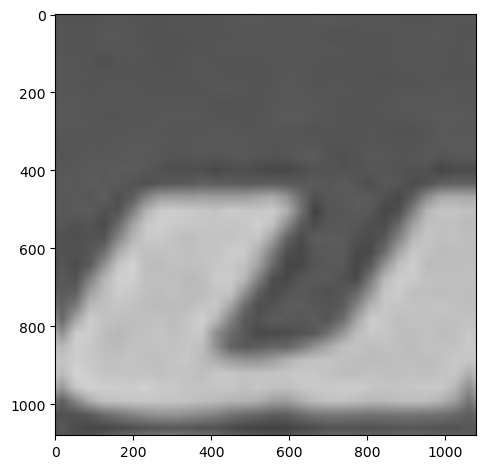

In [9]:
imshow(resize(Gray_datasets_numpy['u'][19],(1080,1080)))

> To ensure uniform image sizes, we seach for the smallest dimensions and reshape all images accordingly.

In [10]:
# Determine the Minimum Image Size

# Initialize the minimum image size to (1000, 1000)
min_size = (1000, 1000)
max_size=(0,0)
# Iterate through the datasets to find the minimum image size
for dataset_name, numpy_list in Gray_datasets_numpy.items():
    for img in numpy_list:
        # Check if the current image's shape is smaller than the current minimum size
        if img.shape < min_size:
            min_size = img.shape
        if img.shape > max_size:
            max_size = img.shape
# Update the variable 'imgs_size' with the determined minimum size

#imgs_size = min_size
#imgs_size = max_size
imgs_size=(128,128)
#imgs_size=(round((max_size[0]+min_size[0])/2),(round((max_size[1]+min_size[1])/2)))

# Print the image sizes as (width x height)
print(f"Image Sizes = ({imgs_size[0]} x {imgs_size[1]})")

Image Sizes = (128 x 128)


> Resize the Images to the Minimum Size

In [11]:
# Iterate through the datasets and resize images to the determined minimum size
for dataset_name, numpy_list in Gray_datasets_numpy.items():
    Gray_datasets_numpy[dataset_name] = [resize(img, imgs_size) for img in numpy_list]

In [12]:
#index_data_list={data_name:list(np.random.choice(np.arange(0, len(gray_img_list)), size=25, replace=False)) for data_name,gray_img_list in Gray_datasets_numpy.items()}
#fig,axes=plt.subplots(5,5,figsize=imgs_size)``
# figs=[plt.figure(figsize=imgs_size) for i in range(len(Gray_datasets_numpy.keys()))]
# for (data_name,img_list),fig in zip(Gray_datasets_numpy.items(),figs):
#     index=index_data_list[data_name]
#     fig.suptitle(f'Dataset{data_name}', fontsize=16)
#     for row in range(5):
#         for col in range(5):
#             ax = fig.add_subplot(5,5,5*row+col+1)
#             ax.imshow(img_list[index[5*row+col]])
#             ax.set_xticks([])
#             ax.set_yticks([])
#             ax.set_title(f"{index[5*row+col]}",fontsize=14)    

# figs=[plt.subplots(5,5,figsize=imgs_size)   for i in range(len(Gray_datasets_numpy.keys()))]   

# for (data_name,img_list),(fig,ax) in zip(Gray_datasets_numpy.items(),figs):
#     index=index_data_list[data_name]
#     fig.suptitle(f'Dataset{data_name}', fontsize=16)
#     for row in range(5):
#         for col in range(5):
#             img=img_list[index[5*row+col]]
#             img=resize(img,imgs_size)
#             ax[row,col].imshow(img_list[index[5*row+col]])
#             ax[row,col].set_xticks([])
#             ax[row,col].set_yticks([])
#             ax[row,col].set_title(f"{index[5*row+col]}")

# plt.show()
            

## Dataset as dataframe

> For enhanced data handling and organization, we construct a DataFrame where each row symbolizes an image. Additionally, we introduce a ```label``` column to signify the character or digit linked to each respective image.

In [13]:
# Create an empty DataFrame with columns representing pixel values
df = pd.DataFrame(columns=[f'pix_{i}' for i in range(imgs_size[0] * imgs_size[1])])
df['label'] = None

In [14]:
# Iterate through the datasets in datasets_numpy
for data_name, img_list in Gray_datasets_numpy.items():
    
    # Iterate through the list of images for each data_name
    for img in img_list:
        
        # Flatten the pixel values from a 2D array to a 1D array
            
        # Create a temporary DataFrame containing the flattened pixel values
        img=img.reshape(1, -1)#/255
        df_tem = pd.DataFrame(img,columns=df.columns[:-1])
        
        
        #df_tem = pd.DataFrame(img.reshape(1, -1),columns=df.columns[:-1])
        # Add a 'label' column with the value of 'data_name'
        df_tem['label'] = data_name
        # Concatenate the temporary DataFrame with the main DataFrame 'df'
        df = pd.concat([df, df_tem],axis=0)
        #df.loc[-1] =df_tem.iloc[0]
        
# Reset the index and drop the old index column to create the final DataFrame
df = df.reset_index(drop=True)


In [15]:
df.head()

,pix_0,pix_1,pix_2,pix_3,pix_4,pix_5,pix_6,pix_7,pix_8,pix_9,...,pix_16375,pix_16376,pix_16377,pix_16378,pix_16379,pix_16380,pix_16381,pix_16382,pix_16383,label
0,0.308587,0.312463,0.312394,0.310815,0.306100,0.310256,0.306945,0.305035,0.309109,0.307960,...,0.310190,0.310536,0.309204,0.305997,0.315621,0.310168,0.315533,0.307746,0.311324,4
1,0.251016,0.251016,0.251016,0.251016,0.251016,0.250905,0.250546,0.250187,0.249829,0.248810,...,0.255342,0.255522,0.255703,0.255883,0.256572,0.257491,0.258409,0.258906,0.257987,4
2,0.241824,0.242165,0.241694,0.241224,0.241419,0.242553,0.243687,0.241730,0.238394,0.235059,...,0.244505,0.244361,0.244794,0.246517,0.248241,0.249092,0.249325,0.249558,0.249390,4
3,0.219142,0.219701,0.219128,0.218556,0.218029,0.218782,0.219534,0.220343,0.222067,0.223791,...,0.213985,0.212210,0.212796,0.213529,0.214262,0.214442,0.214601,0.214761,0.214605,4
4,0.218162,0.215411,0.216898,0.219649,0.222400,0.223880,0.222539,0.221199,0.219858,0.220005,...,0.194889,0.202954,0.211018,0.219083,0.222623,0.224122,0.225621,0.226432,0.224932,4


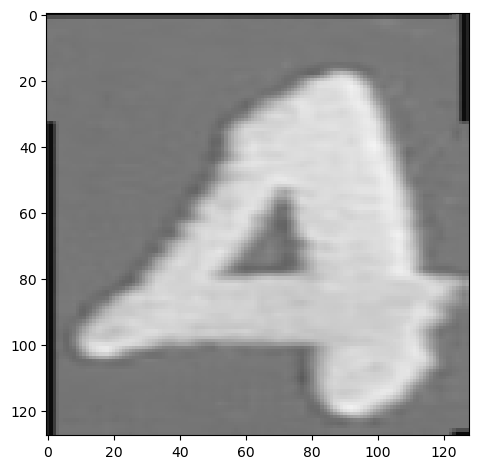

In [16]:
imshow(np.array(df.iloc[100,:-1],dtype=np.float32).reshape(imgs_size))

# Conversion of Data Labels

> To prepare this DataFrame for our training process, we will convert the ```label``` column from a string data type to a numerical data type using label encoding.

In [17]:
# Initialize a LabelEncoder object for converting categorical labels to numerical values
label_encoder = LabelEncoder()

# Use the LabelEncoder to transform the 'label' column and create a new 'encoding_label' column
df['encoding_label'] = label_encoder.fit_transform(df['label'])
# Print a message indicating the label conversion

encodig_dic={k:v for v,k in zip(df['label'].unique(),df['encoding_label'].unique())}

print(f"Converted the labels from {list(encodig_dic.values())} to {list(encodig_dic.keys())}")


Converted the labels from ['4', 'A', 'u', 'H'] to [0, 1, 3, 2]


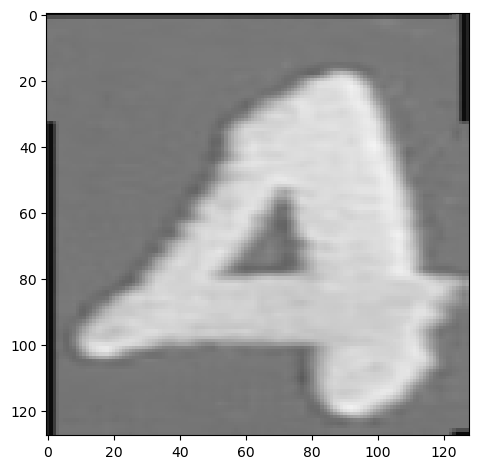

In [18]:
# diplay the charater 'A'
imshow(np.array(df.iloc[100,:-2],dtype=np.float32).reshape(imgs_size))

# Train Binary Classification Model and Evaluate Performance

## Assumption for Model:
> In this model, we consider 'Class 4' as ```positive class``` and 'Class A' as ```negative Class```.


In [19]:
# Combine samples labeled as '4' and 'A' for binary classification
train_binary_classification = pd.concat([df[df['label'] == '4'], df[df['label'] == 'A']]).reset_index(drop=True)

# Split the data into training and testing sets
X, x_test, Y, y_test = train_test_split(train_binary_classification.iloc[:, :-2],
                                                    train_binary_classification.iloc[:, -1],
                                                    test_size=0.1, train_size=0.9, shuffle=True)


x_train, x_valdiation, y_train, y_validation = train_test_split(X,Y,test_size=0.2, train_size=0.8, shuffle=True)

# Reset the index for training and testing dataframes
x_train = x_train.reset_index(drop=True)
x_test = x_test.reset_index(drop=True)
x_valdiation=x_valdiation.reset_index(drop=True)

# Flatten the target labels
# y_train = np.ravel(y_train)
# y_test = np.ravel(y_test)
# y_validation=np.ravel(y_validation)
# Create binary labels for '4' (True) and other labels (False) in training and testing sets
# y_train_4 = np.array([1 if count == '4' else 0 for count in y_train])
# y_test_4 = np.array([1 if count == '4' else 0 for count in y_test])
# y_validation_4 = np.array([1 if count == '4' else 0 for count in y_validation])

y_train_4 = y_train.copy()
y_test_4 = y_test.copy()
y_validation_4 = y_validation.copy()



In [20]:
print(f"size of Trian data{x_train.shape}",f"size of validation data{x_valdiation.shape}",f"size of test data{x_test.shape}",sep='\n-------\n')

size of Trian data(841, 16384)
-------
size of validation data(211, 16384)
-------
size of test data(117, 16384)


In [21]:
# Create a Binary Classification Model using Logistic Regression
binary_classification_model = LogisticRegression(max_iter=1000,solver='saga',C=0.05,tol=0.001)#0.0005

# Train the Binary Classification Model on the training data
binary_classification_model_his = binary_classification_model.fit(x_train, y_train_4)


+-----------+----------+
|  metric   |  value   |
+===========+==========+
| precision | 0.955556 |
+-----------+----------+
|  recall   | 0.977273 |
+-----------+----------+
| Accuracy  | 0.971564 |
+-----------+----------+
| F1 Score  | 0.966292 |
+-----------+----------+ 



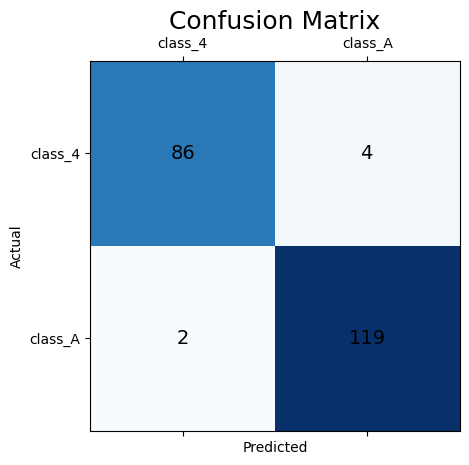

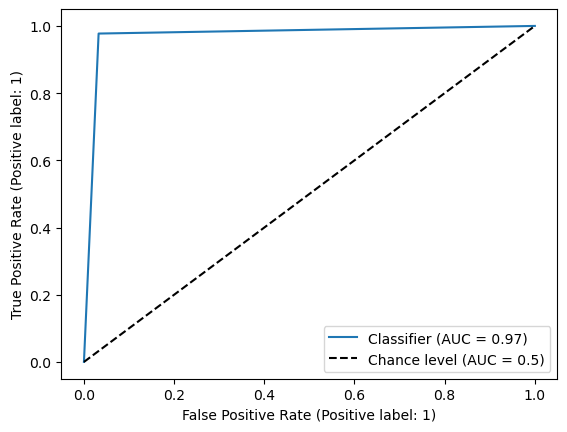

In [22]:
y_pred_validation=binary_classification_model.predict(x_valdiation)
# Initialize the evaluator with actual and predicted labels
validation_evaluator = evaluate_classification_model(y_validation_4, y_pred_validation,classes_name=["class_4","class_A"])
# Calculate and print various evaluation metrics
validation_evaluator.print_model_report()
# Display the confusion matrix
validation_evaluator.conf_matrix()
RocCurveDisplay.from_predictions(y_validation_4,y_pred_validation,plot_chance_level=True)
plt.show()

+-----------+----------+
|  metric   |  value   |
+===========+==========+
| precision | 0.953811 |
+-----------+----------+
|  recall   | 0.997585 |
+-----------+----------+
| Accuracy  | 0.97503  |
+-----------+----------+
| F1 Score  | 0.975207 |
+-----------+----------+ 



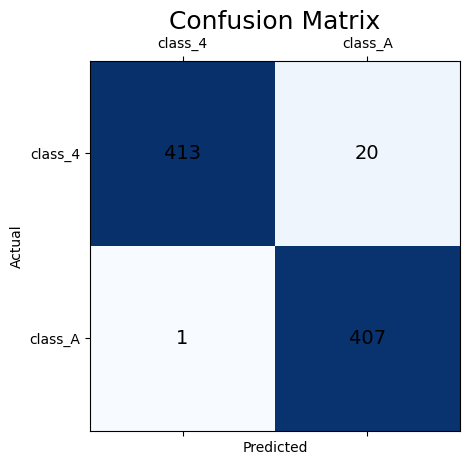

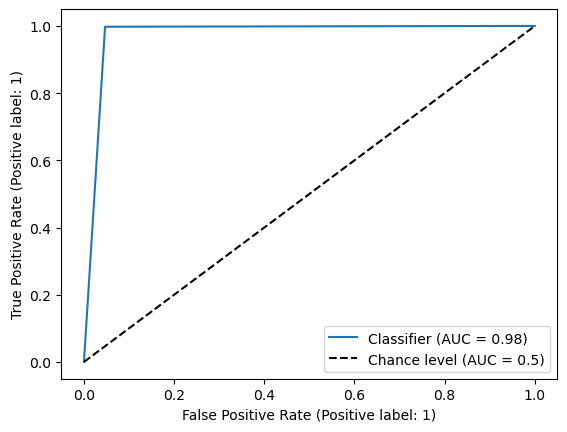

In [23]:
y_pred_train=binary_classification_model.predict(x_train)
# Initialize the evaluator with actual and predicted labels
train_evaluator = evaluate_classification_model(y_train_4, y_pred_train,classes_name=["class_4","class_A"])
# Calculate and print various evaluation metrics
train_evaluator.print_model_report()
# Display the confusion matrix
train_evaluator.conf_matrix()
RocCurveDisplay.from_predictions(y_train_4,y_pred_train,plot_chance_level=True)
plt.show()

+-----------+----------+
|  metric   |  value   |
+===========+==========+
| precision | 0.982456 |
+-----------+----------+
|  recall   |    1     |
+-----------+----------+
| Accuracy  | 0.991453 |
+-----------+----------+
| F1 Score  | 0.99115  |
+-----------+----------+ 



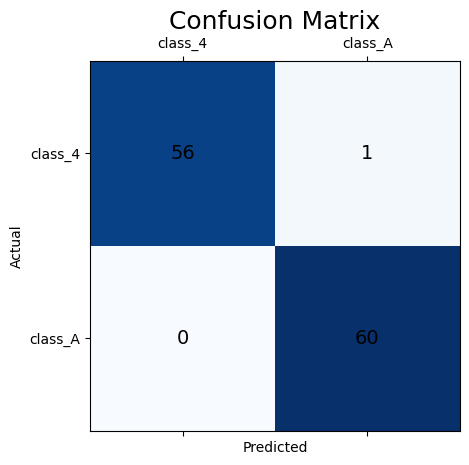

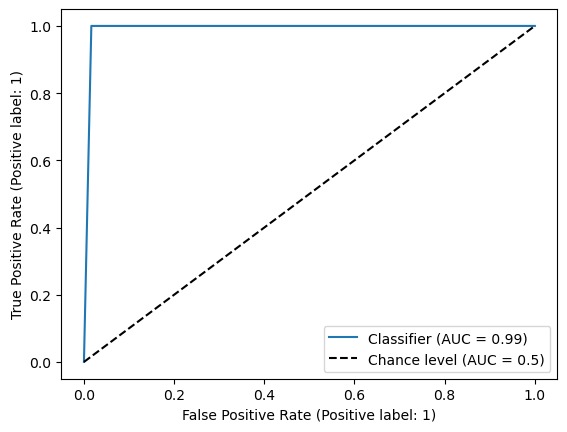

In [24]:
y_pred_test=binary_classification_model.predict(x_test)
# Initialize the evaluator with actual and predicted labels
test_evaluator = evaluate_classification_model(y_test_4, y_pred_test,classes_name=["class_4","class_A"])
# Calculate and print various evaluation metrics
test_evaluator.print_model_report()
# Display the confusion matrix
test_evaluator.conf_matrix()
RocCurveDisplay.from_predictions(y_test_4,y_pred_test,plot_chance_level=True)
plt.show()



# Train Multiclass Classification Model and Evaluate Performance

In [25]:
train_multiclass_classification=df.drop(['label'],inplace=False,axis=1)

In [26]:
train_multiclass_classification.head()

,pix_0,pix_1,pix_2,pix_3,pix_4,pix_5,pix_6,pix_7,pix_8,pix_9,...,pix_16375,pix_16376,pix_16377,pix_16378,pix_16379,pix_16380,pix_16381,pix_16382,pix_16383,encoding_label
0,0.308587,0.312463,0.312394,0.310815,0.306100,0.310256,0.306945,0.305035,0.309109,0.307960,...,0.310190,0.310536,0.309204,0.305997,0.315621,0.310168,0.315533,0.307746,0.311324,0
1,0.251016,0.251016,0.251016,0.251016,0.251016,0.250905,0.250546,0.250187,0.249829,0.248810,...,0.255342,0.255522,0.255703,0.255883,0.256572,0.257491,0.258409,0.258906,0.257987,0
2,0.241824,0.242165,0.241694,0.241224,0.241419,0.242553,0.243687,0.241730,0.238394,0.235059,...,0.244505,0.244361,0.244794,0.246517,0.248241,0.249092,0.249325,0.249558,0.249390,0
3,0.219142,0.219701,0.219128,0.218556,0.218029,0.218782,0.219534,0.220343,0.222067,0.223791,...,0.213985,0.212210,0.212796,0.213529,0.214262,0.214442,0.214601,0.214761,0.214605,0
4,0.218162,0.215411,0.216898,0.219649,0.222400,0.223880,0.222539,0.221199,0.219858,0.220005,...,0.194889,0.202954,0.211018,0.219083,0.222623,0.224122,0.225621,0.226432,0.224932,0


In [27]:
# Split the data into training and testing sets
X, x_test, Y, y_test = train_test_split(train_multiclass_classification.iloc[:,:-1],
                                        train_multiclass_classification.iloc[:,-1:],
                                        test_size=0.1, train_size=0.9, shuffle=True)


x_train, x_valdiation, y_train, y_validation = train_test_split(X,Y,test_size=0.2, train_size=0.8, shuffle=True)

# Reset the index for training and testing dataframes
x_train = x_train.reset_index(drop=True)
x_test = x_test.reset_index(drop=True)
x_valdiation=x_valdiation.reset_index(drop=True)
# Flatten the target labels
y_train = np.ravel(y_train)
y_test = np.ravel(y_test)
y_validation=np.ravel(y_validation)

In [28]:
print(f"size of Trian data{x_train.shape}",f"size of validation data{x_valdiation.shape}",f"size of test data{x_test.shape}",sep='\n-------\n')

size of Trian data(1840, 16384)
-------
size of validation data(460, 16384)
-------
size of test data(256, 16384)


In [29]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import cross_validate,cross_val_predict
multicalss_classification_model = LogisticRegression(max_iter=1000,C=0.05,tol=0.001)#max_iter=5000,solver='sag',multi_class='auto',C=0.0005

clf = OneVsRestClassifier(multicalss_classification_model,verbose=1)
#cross_val=cross_val_predict(clf,x_train,y_train)
clf.fit(x_train, y_train)
#multicalss_classification_model.fit(x_train, y_train)

OneVsRestClassifier(estimator=LogisticRegression(C=0.05, max_iter=1000,
                                                 tol=0.001),
                    verbose=1)

+-----------+----------+----------+----------+----------+-----------------+-----------------+
|  metric   |    4     |    A     |    H     |    u     |  Macro average  |  Micro average  |
+===========+==========+==========+==========+==========+=================+=================+
| precision | 0.95614  | 0.722222 | 0.898438 | 0.954545 |    0.882836     |    0.884783     |
+-----------+----------+----------+----------+----------+-----------------+-----------------+
|  recall   | 0.990909 | 0.83871  | 0.782313 | 0.954545 |    0.884783     |    0.884783     |
+-----------+----------+----------+----------+----------+-----------------+-----------------+
| accuracy  | 0.986957 | 0.902174 | 0.902174 | 0.978261 |    0.942391     |    0.942391     |
+-----------+----------+----------+----------+----------+-----------------+-----------------+
| f1_score  | 0.973214 | 0.776119 | 0.836364 | 0.954545 |    0.887206     |    0.883808     |
+-----------+----------+----------+----------+----------+---

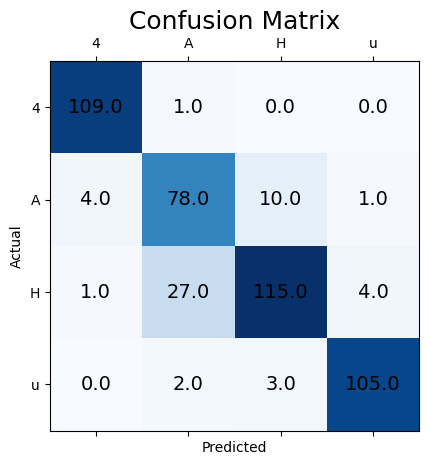

In [30]:
p=clf.predict(x_valdiation)
ev=evaluate_classification_model(y_validation, p,multiclass=True,classes_name=[encodig_dic[class_name] for class_name in np.unique(y_train) ])
ev.print_model_report()
ev.conf_matrix()

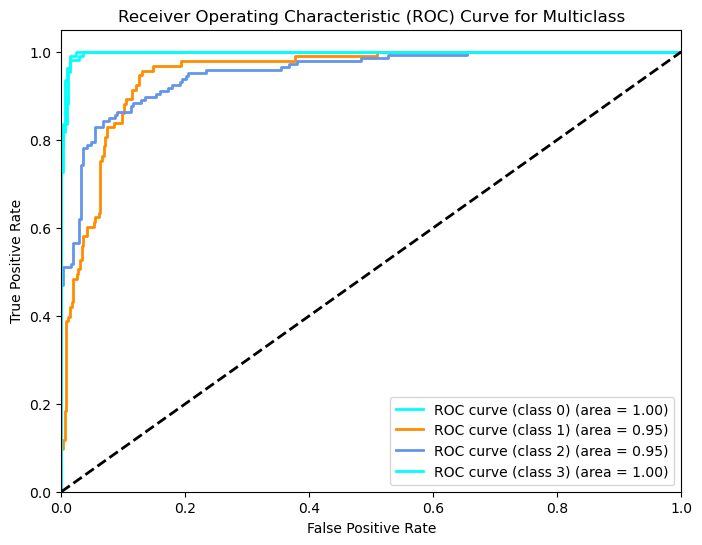

In [31]:
multiclass_ROC(clf,x_valdiation,y_validation)

+-----------+----------+----------+----------+----------+-----------------+-----------------+
|  metric   |    4     |    A     |    H     |    u     |  Macro average  |  Micro average  |
+===========+==========+==========+==========+==========+=================+=================+
| precision | 0.995381 |   0.85   | 0.94902  | 0.990847 |    0.946312     |    0.945109     |
+-----------+----------+----------+----------+----------+-----------------+-----------------+
|  recall   | 0.977324 | 0.965432 | 0.89464  | 0.95585  |    0.945109     |    0.945109     |
+-----------+----------+----------+----------+----------+-----------------+-----------------+
| accuracy  | 0.993478 | 0.954891 | 0.954891 | 0.986957 |    0.972554     |    0.972554     |
+-----------+----------+----------+----------+----------+-----------------+-----------------+
| f1_score  | 0.98627  | 0.904046 | 0.921028 | 0.973034 |    0.947311     |     0.94571     |
+-----------+----------+----------+----------+----------+---

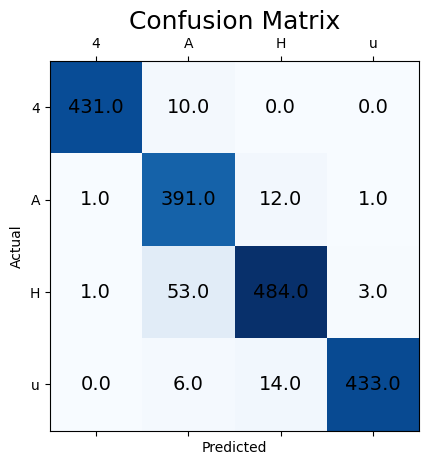

In [32]:
p=clf.predict(x_train)
ev=evaluate_classification_model(y_train, p,multiclass=True,classes_name=[encodig_dic[class_name] for class_name in np.unique(y_train) ])
ev.print_model_report()
ev.conf_matrix()

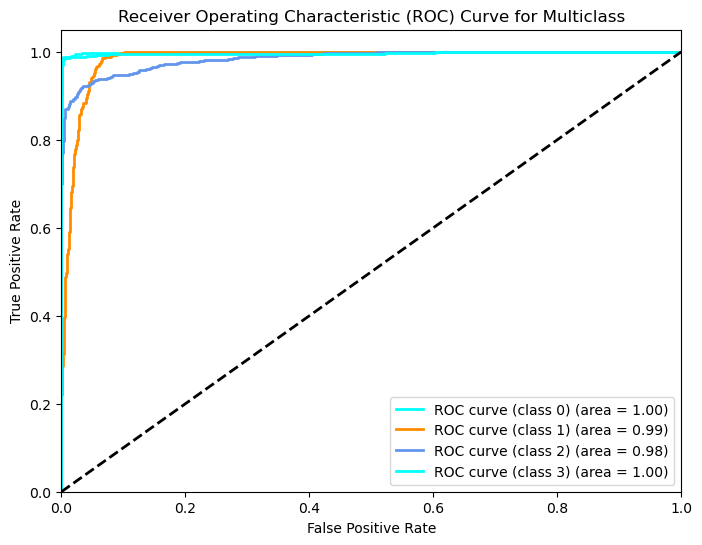

In [33]:
multiclass_ROC(clf,x_train,y_train)

+-----------+----------+----------+----------+----------+-----------------+-----------------+
|  metric   |    4     |    A     |    H     |    u     |  Macro average  |  Micro average  |
+===========+==========+==========+==========+==========+=================+=================+
| precision | 0.995381 |   0.85   | 0.94902  | 0.990847 |    0.946312     |    0.945109     |
+-----------+----------+----------+----------+----------+-----------------+-----------------+
|  recall   | 0.977324 | 0.965432 | 0.89464  | 0.95585  |    0.945109     |    0.945109     |
+-----------+----------+----------+----------+----------+-----------------+-----------------+
| accuracy  | 0.993478 | 0.954891 | 0.954891 | 0.986957 |    0.972554     |    0.972554     |
+-----------+----------+----------+----------+----------+-----------------+-----------------+
| f1_score  | 0.98627  | 0.904046 | 0.921028 | 0.973034 |    0.947311     |     0.94571     |
+-----------+----------+----------+----------+----------+---

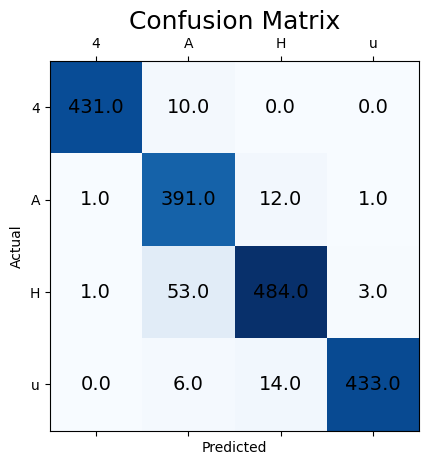

In [34]:
p=clf.predict(x_train)
ev=evaluate_classification_model(y_train, p,multiclass=True,classes_name=[encodig_dic[class_name] for class_name in np.unique(y_train) ])
ev.print_model_report()
ev.conf_matrix()

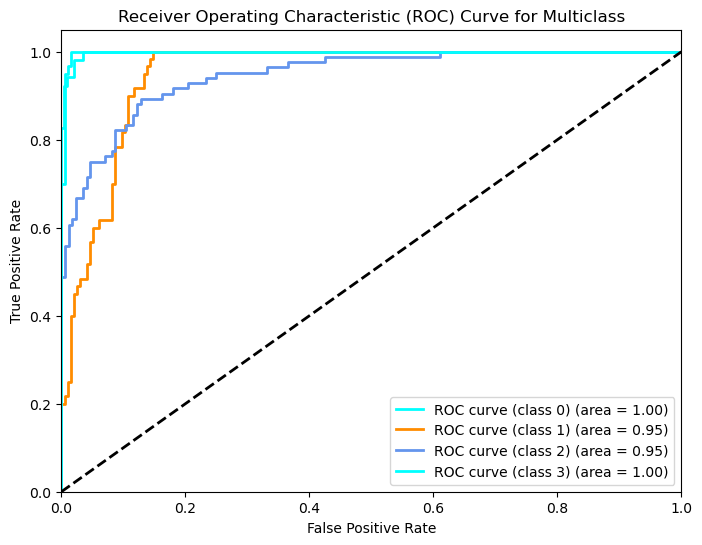

In [35]:
multiclass_ROC(clf,x_test,y_test)